# Capstone Project : Battle of Neighborhood Singapore(week2)

### Introduction: Business Problem

Idea of this project is - If a business person want to open a restaurant in Singapore, help him/her analyse which area would be better depending on competition and population within Singapore.

### Data
For the problem mentioned we would need data

* Restaurant around Singapore

* Population

In [84]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import random # library for random number generation

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # import geocoder
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    

import folium # plotting library


In [85]:
CLIENT_ID = 'HMARSYLG2FS0XHOYWO2NGQ223TZFZRLPO3OZCQA1PNOCRMFV' # your Foursquare ID
CLIENT_SECRET = 'REQI3H5CUGG5AY4HEUICQ13BBUQJ0UMSCZTMKYV4FQPX5V1P' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HMARSYLG2FS0XHOYWO2NGQ223TZFZRLPO3OZCQA1PNOCRMFV
CLIENT_SECRET:REQI3H5CUGG5AY4HEUICQ13BBUQJ0UMSCZTMKYV4FQPX5V1P


In [86]:
address = 'Singapore, Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(latitude, longitude)

1.357107 103.8194992


In [87]:
rest_df=pd.DataFrame()
list_rest = ['Pizza','Mac Donalds\'s','Restaurant','KFC','Burger King','Subway','Cafe']
radius = 25000
results={}
for search_query in list_rest:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results=requests.get(url).json()
    restaurant= results['response']['venues']
    df = json_normalize(restaurant)
    rest_df=rest_df.append(df,ignore_index=True,sort=False)
    
rest_df.shape

(210, 18)

In [88]:
filtered_columns = ['name', 'categories'] + [col for col in rest_df.columns if col.startswith('location.')] + ['id']
rest_filtered = rest_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
rest_filtered['categories'] = rest_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
rest_filtered.columns = [column.split('.')[-1] for column in rest_filtered.columns]



rest_filtered.head(5)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,country,formattedAddress,neighborhood,state,id
0,Pizza Hut,Pizza Place,#02-24/26 Thomson Plaza,301 Upp Thomson Rd,1.354825,103.831308,"[{'label': 'display', 'lat': 1.354824552056095...",1338,574408,SG,Singapore,Singapore,"[#02-24/26 Thomson Plaza (301 Upp Thomson Rd),...",NaN,NaN,4c33311f3896e21e2a93e990
1,Canadian Pizza,Pizza Place,764 Upper Serangoon Road,NaN,1.353691,103.878824,"[{'label': 'display', 'lat': 1.353690524496850...",6613,534633,SG,NaN,Singapore,"[764 Upper Serangoon Road, 534633, Singapore]",NaN,NaN,4cbbdeb17148f04d44c4e4ab
2,Pizza Hut,Pizza Place,715 Ang Mo Kio Ave 6 #01-4000,NaN,1.370881,103.845656,"[{'label': 'display', 'lat': 1.370881403101114...",3290,560715,SG,Singapore,Singapore,"[715 Ang Mo Kio Ave 6 #01-4000, 560715, Singap...",NaN,NaN,4cf4e28c88de3704283e872b
3,Pizza Hut,Pizza Place,"#02-33/35, Bukit Panjang Plaza",1 Jelebu Rd,1.380339,103.763948,"[{'label': 'display', 'lat': 1.380338582335005...",6701,677743,SG,Singapore,Singapore,"[#02-33/35, Bukit Panjang Plaza (1 Jelebu Rd),...",NaN,NaN,4be780dcee96c9280421fdbf
4,Pizza Hut,Pizza Place,"#B1-25, Causeway Point",1 Woodlands Square,1.435612,103.785518,"[{'label': 'display', 'lat': 1.435612244818575...",9522,738099,SG,Singapore,Singapore,"[#B1-25, Causeway Point (1 Woodlands Square), ...",NaN,NaN,4b8254a1f964a52003d030e3


In [89]:

rest_filtered.set_index("cc",inplace=True)
rest_filtered.drop(["MY"], axis = 0, inplace = True)
#rest_filtered['cc'].value_counts()
#rest_filtered.head()

In [90]:
#rest_filtered['']=list(range(rest_filtered.shape[0])
#rest_filtered.set_index([''],inplace=True)               
rest_filtered.head(5)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,city,country,formattedAddress,neighborhood,state,id
cc,,,,,,,,,,,,,,,
SG,Pizza Hut,Pizza Place,#02-24/26 Thomson Plaza,301 Upp Thomson Rd,1.354825,103.831308,"[{'label': 'display', 'lat': 1.354824552056095...",1338,574408,Singapore,Singapore,"[#02-24/26 Thomson Plaza (301 Upp Thomson Rd),...",NaN,NaN,4c33311f3896e21e2a93e990
SG,Canadian Pizza,Pizza Place,764 Upper Serangoon Road,NaN,1.353691,103.878824,"[{'label': 'display', 'lat': 1.353690524496850...",6613,534633,NaN,Singapore,"[764 Upper Serangoon Road, 534633, Singapore]",NaN,NaN,4cbbdeb17148f04d44c4e4ab
SG,Pizza Hut,Pizza Place,715 Ang Mo Kio Ave 6 #01-4000,NaN,1.370881,103.845656,"[{'label': 'display', 'lat': 1.370881403101114...",3290,560715,Singapore,Singapore,"[715 Ang Mo Kio Ave 6 #01-4000, 560715, Singap...",NaN,NaN,4cf4e28c88de3704283e872b
SG,Pizza Hut,Pizza Place,"#02-33/35, Bukit Panjang Plaza",1 Jelebu Rd,1.380339,103.763948,"[{'label': 'display', 'lat': 1.380338582335005...",6701,677743,Singapore,Singapore,"[#02-33/35, Bukit Panjang Plaza (1 Jelebu Rd),...",NaN,NaN,4be780dcee96c9280421fdbf
SG,Pizza Hut,Pizza Place,"#B1-25, Causeway Point",1 Woodlands Square,1.435612,103.785518,"[{'label': 'display', 'lat': 1.435612244818575...",9522,738099,Singapore,Singapore,"[#B1-25, Causeway Point (1 Woodlands Square), ...",NaN,NaN,4b8254a1f964a52003d030e3


In [91]:
#Cleaning the DataFrame
rest_df_clear=rest_filtered[['name','categories','lat','lng','postalCode','address']]
rest_df_clear.head()

,name,categories,lat,lng,postalCode,address
cc,,,,,,
SG,Pizza Hut,Pizza Place,1.354825,103.831308,574408,#02-24/26 Thomson Plaza
SG,Canadian Pizza,Pizza Place,1.353691,103.878824,534633,764 Upper Serangoon Road
SG,Pizza Hut,Pizza Place,1.370881,103.845656,560715,715 Ang Mo Kio Ave 6 #01-4000
SG,Pizza Hut,Pizza Place,1.380339,103.763948,677743,"#02-33/35, Bukit Panjang Plaza"
SG,Pizza Hut,Pizza Place,1.435612,103.785518,738099,"#B1-25, Causeway Point"


In [150]:
rest_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Singapore


for lat, lng, label in zip(rest_df_clear.lat, rest_df_clear.lng, rest_df_clear.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(rest_map)

rest_map

Geting the Postal Code Details from https://en.wikipedia.org/wiki/Postal_codes_in_Singapore#6-digit_postal_code

In [93]:
from bs4 import BeautifulSoup as bs

In [94]:
#get the web link
link='https://en.wikipedia.org/wiki/Postal_codes_in_Singapore#6-digit_postal_code'
source=requests.get(link).text
web=bs(source,'lxml')

In [95]:
table1=web.find('table', class_='wikitable')
data_table=[]
for data in table1.find_all('tr'):
    data_table.append(data)

In [96]:
data_list=[]
for data in data_table:
    v=data.text.split('\n')
    re=['']
    res = [i for i in v if i not in re]
    data_list.append(res)
sg_post=pd.DataFrame(data_list)
sg_post.head()

,0,1,2
0,Postal district,Postal sector(1st 2 digits of 6-digit postal c...,General location
1,01,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
2,02,"07, 08","Anson, Tanjong Pagar"
3,03,"14, 15, 16","Bukit Merah, Queenstown, Tiong Bahru"
4,04,"09, 10","Telok Blangah, Harbourfront"


In [97]:
sg_post.rename(columns=sg_post.iloc[0,:],inplace=True)
sg_post.drop(sg_post[sg_post['Postal district'] == 'Postal district'].index, inplace = True)
sg_post=sg_post.reset_index()
sg_post.drop(['index'],axis=1,inplace=True)
sg_post

,Postal district,Postal sector(1st 2 digits of 6-digit postal codes),General location
0,01,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
1,02,"07, 08","Anson, Tanjong Pagar"
2,03,"14, 15, 16","Bukit Merah, Queenstown, Tiong Bahru"
3,04,"09, 10","Telok Blangah, Harbourfront"
4,05,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi New..."
5,06,17,"High Street, Beach Road (part)"
6,07,"18, 19","Middle Road, Golden Mile"
7,08,"20, 21","Little India, Farrer Park, Jalan Besar, Lavender"
8,09,"22, 23","Orchard, Cairnhill, River Valley"
9,10,"24, 25, 26, 27","Ardmore, Bukit Timah, Holland Road, Tanglin"


In [98]:
rest_df_clear['Postal district']=''
for num,post in enumerate(rest_df_clear.iloc[:,4]):
    for index,dis in enumerate(sg_post.iloc[:,1]):
        for i in dis.split(','):
            text=str(i.strip(' '))
            che=str(post)
            if che[0:2]==text:
                entry=sg_post.iloc[index,0]
                rest_df_clear.iloc[num,6]=entry

rest_df_clear.head()

<ipython-input-98-e62086690418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_df_clear['Postal district']=''


,name,categories,lat,lng,postalCode,address,Postal district
cc,,,,,,,
SG,Pizza Hut,Pizza Place,1.354825,103.831308,574408,#02-24/26 Thomson Plaza,20
SG,Canadian Pizza,Pizza Place,1.353691,103.878824,534633,764 Upper Serangoon Road,19
SG,Pizza Hut,Pizza Place,1.370881,103.845656,560715,715 Ang Mo Kio Ave 6 #01-4000,20
SG,Pizza Hut,Pizza Place,1.380339,103.763948,677743,"#02-33/35, Bukit Panjang Plaza",23
SG,Pizza Hut,Pizza Place,1.435612,103.785518,738099,"#B1-25, Causeway Point",25


In [134]:
#Print Unique categoeries
sg_rest=rest_df_clear.dropna(axis = 0)
print("Unique category of Singapore districts venues: ", len(sg_rest['categories'].unique()))
print(rest_df_clear.shape)
sg_rest.shape

Unique category of Singapore districts venues:  6
(201, 7)


(154, 7)

In [148]:
cat1=['Playground','Jazz Club','Internet Cafe','General College & University','Bank','Trail','Student Center','Noodle House','Convenience Store',
     'Theme Park','Post Office','Brewery','College Classroom','Electronics Store','College Lab','Cosmetics Shop',
     'Steakhouse','Park']

cat2=['Chinese Restaurant','Indian Restaurant','Scandinavian Restaurant','Italian Restaurant','Japanese Restaurant','American Restaurant'
     'Asian Restaurant','Halal Restaurant','Hainan Restaurant','Vegetarian / Vegan Restaurant','Dim Sum Restaurant','Hong Kong Restaurant'
     'Seafood Restaurant','Restaurant','American Restaurant','Hong Kong Restaurant','Asian Restaurant','Seafood Restaurant',
     'Malay Restaurant','Thai Restaurant','Korean Restaurant']
cat3=['Café','Bubble Tea Shop','Tea Room','Dessert Shop','Coffee Shop']
cat4=['Burger Joint','Fried Chicken Joint','Fast Food Restaurant','Diner','Food Court']

for index,kind in enumerate(sg_rest.iloc[:,1]):
        for typ in cat1:
            if kind==typ:
                sg_rest.iloc[index,1]='Other'

for index,kind in enumerate(sg_rest.iloc[:,1]):
        for typ in cat2:
            if kind==typ:
                sg_rest.iloc[index,1]='Restaurant'

for index,kind in enumerate(sg_rest.iloc[:,1]):
        for typ in cat3:
            if kind==typ:
                sg_rest.iloc[index,1]='Café'
                
for index,kind in enumerate(sg_rest.iloc[:,1]):
        for typ in cat4:
            if kind==typ:
                sg_rest.iloc[index,1]='Fast Food Restaurant'
                
sg_rest.head()

,name,categories,lat,lng,postalCode,address,Postal district,Fast Food Restaurant,Sandwich Place,Pizza Place,Restaurant,Café,Other
cc,,,,,,,,,,,,,
SG,Pizza Hut,Pizza Place,1.354825,103.831308,574408,#02-24/26 Thomson Plaza,20,0,0,1,0,0,0
SG,Canadian Pizza,Pizza Place,1.353691,103.878824,534633,764 Upper Serangoon Road,19,0,0,1,0,0,0
SG,Pizza Hut,Pizza Place,1.370881,103.845656,560715,715 Ang Mo Kio Ave 6 #01-4000,20,0,0,1,0,0,0
SG,Pizza Hut,Pizza Place,1.380339,103.763948,677743,"#02-33/35, Bukit Panjang Plaza",23,0,0,1,0,0,0
SG,Pizza Hut,Pizza Place,1.435612,103.785518,738099,"#B1-25, Causeway Point",25,0,0,1,0,0,0


In [136]:
sg_rest['Fast Food Restaurant']=(sg_rest['categories'].str.contains('Fast Food Restaurant')).astype(int)
sg_rest['Sandwich Place']=(sg_rest['categories'].str.contains('Sandwich Place')).astype(int)
sg_rest['Pizza Place']=(sg_rest['categories'].str.contains('Pizza Place')).astype(int)
sg_rest['Restaurant']=(sg_rest['categories'].str.contains('Restaurant')).astype(int)
sg_rest['Café']=(sg_rest['categories'].str.contains('Café')).astype(int)
sg_rest['Other']=(sg_rest['categories'].str.contains('Café')).astype(int)

sg_rest.head()

<ipython-input-136-94d146470022>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_rest['Fast Food Restaurant']=(sg_rest['categories'].str.contains('Fast Food Restaurant')).astype(int)
<ipython-input-136-94d146470022>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_rest['Sandwich Place']=(sg_rest['categories'].str.contains('Sandwich Place')).astype(int)
<ipython-input-136-94d146470022>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,name,categories,lat,lng,postalCode,address,Postal district,Fast Food Restaurant,Sandwich Place,Pizza Place,Restaurant,Café,Other
cc,,,,,,,,,,,,,
SG,Pizza Hut,Pizza Place,1.354825,103.831308,574408,#02-24/26 Thomson Plaza,20,0,0,1,0,0,0
SG,Canadian Pizza,Pizza Place,1.353691,103.878824,534633,764 Upper Serangoon Road,19,0,0,1,0,0,0
SG,Pizza Hut,Pizza Place,1.370881,103.845656,560715,715 Ang Mo Kio Ave 6 #01-4000,20,0,0,1,0,0,0
SG,Pizza Hut,Pizza Place,1.380339,103.763948,677743,"#02-33/35, Bukit Panjang Plaza",23,0,0,1,0,0,0
SG,Pizza Hut,Pizza Place,1.435612,103.785518,738099,"#B1-25, Causeway Point",25,0,0,1,0,0,0


In [142]:
sg_group_rest = sg_rest.groupby('Postal district').sum().reset_index()
sg_group_rest = sg_group_rest.drop(columns=['lat','lng'])
sg_group_rest.head()

,Postal district,Fast Food Restaurant,Sandwich Place,Pizza Place,Restaurant,Café,Other
0,01,3,2,0,4,1,1
1,02,1,0,0,1,0,0
2,03,3,2,0,4,0,0
3,04,1,0,0,1,0,0
4,05,4,3,0,4,0,0


In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

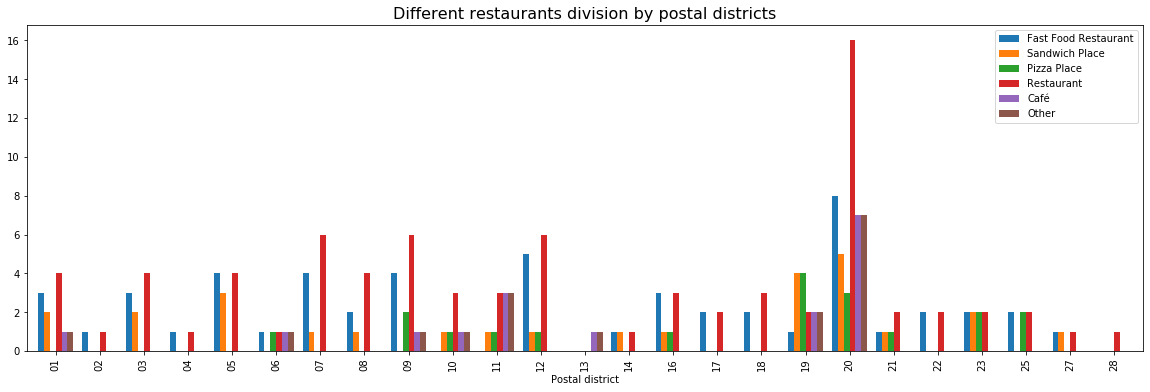

In [144]:
ax1=sg_group_rest.plot(x='Postal district',y=['Fast Food Restaurant','Sandwich Place','Pizza Place','Restaurant','Café','Other'], kind='bar',figsize = (20,6),
                width = 0.8)
ax1.set_title("Different restaurants division by postal districts", 
             fontsize = 16)
plt.show()

In [145]:
totalfast =sg_group_rest['Fast Food Restaurant'].sum()
sg_group_rest['fast_percent']=(sg_group_rest['Fast Food Restaurant']/totalfast)*100
totalsand =sg_group_rest['Sandwich Place'].sum()
sg_group_rest['sand_percent']=(sg_group_rest['Sandwich Place']/totalsand)*100
totalpizza =sg_group_rest['Pizza Place'].sum()
sg_group_rest['pizza_percent']=(sg_group_rest['Pizza Place']/totalpizza)*100
totalrest =sg_group_rest['Restaurant'].sum()
sg_group_rest['rest_percent']=(sg_group_rest['Restaurant']/totalrest)*100
totalcafe =sg_group_rest['Café'].sum()
sg_group_rest['cafe_percent']=(sg_group_rest['Café']/totalcafe)*100
totalother =sg_group_rest['Other'].sum()
sg_group_rest['other_percent']=(sg_group_rest['Other']/totalother)*100

sg_group_rest.head()

,Postal district,Fast Food Restaurant,Sandwich Place,Pizza Place,Restaurant,Café,Other,fast_percent,sand_percent,pizza_percent,rest_percent,cafe_percent,other_percent
0,01,3,2,0,4,1,1,5.660377,7.407407,0.0,5.00,5.882353,5.882353
1,02,1,0,0,1,0,0,1.886792,0.000000,0.0,1.25,0.000000,0.000000
2,03,3,2,0,4,0,0,5.660377,7.407407,0.0,5.00,0.000000,0.000000
3,04,1,0,0,1,0,0,1.886792,0.000000,0.0,1.25,0.000000,0.000000
4,05,4,3,0,4,0,0,7.547170,11.111111,0.0,5.00,0.000000,0.000000


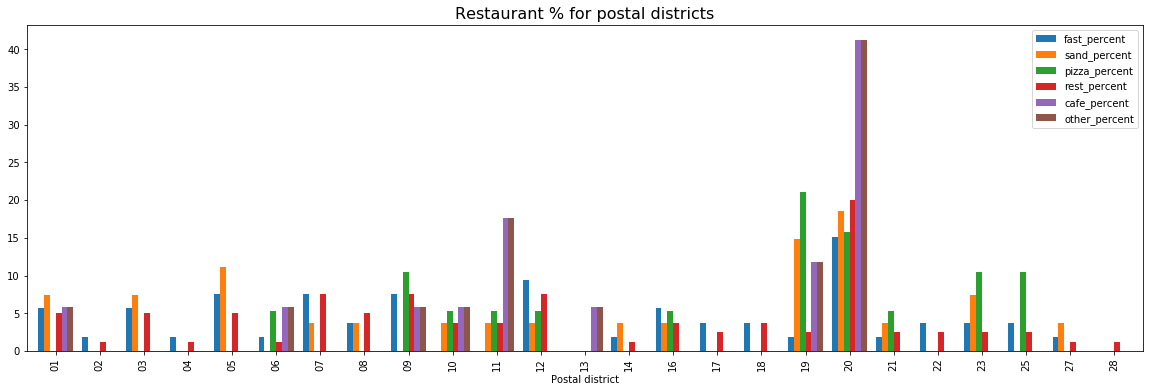

In [147]:
#plot restaurant % areawise
ax1=sg_group_rest.plot(x='Postal district',y=['fast_percent','sand_percent','pizza_percent','rest_percent','cafe_percent','other_percent'], kind='bar',figsize = (20,6),
                width = 0.8)
ax1.set_title("Restaurant % for postal districts", 
             fontsize = 16)
plt.show()

In [154]:
def get_color(category):
    if 'Fast Food Restaurant' in category:
        col = 'red'
    if 'Sandwich Place' in category:
        col = 'orange'
    if 'Pizza Place' in category:
        col = 'green'
    if 'Restaurant' in category:
        col = 'blue'
    if 'Café' in category:
        col='black'
    if 'Other' in category:
        col='yellow'
    return col

map_sg = folium.Map(location=[latitude, longitude], zoom_start=12)
                              
sg_plot = sg_rest[sg_rest['categories'].str.contains('Fast Food Restaurant') | sg_rest['categories'].str.contains('Sandwich Place') | sg_rest['categories'].str.contains('Pizza Place')| sg_rest['categories'].str.contains('Restaurant') | sg_rest['categories'].str.contains('Pizza Place')
                  |sg_rest['categories'].str.contains('Café')|sg_rest['categories'].str.contains('Other')] 
for lat, lon,area, cat in zip(sg_plot['lat'], sg_plot['lng'],sg_plot['Postal district'],sg_plot['categories']):
    folium.CircleMarker([lat, lon], radius=5, 
                        popup=area,
                        color=get_color(cat), 
                        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)
    
map_sg


### Conclusion

Assuming increasing population in singapore most and import place to open a restaurant is Postal district 12.
Therefore best place to open a restaurant are Balestier, Toa Payoh, Serangoon. My best perferance is Serangoon for open a resturant.